# Spam Classifier

In [1]:
import pandas as pd #for creating dataframe
import matplotlib.pyplot as plt #for designing plots
import re #regular expression matching
import nltk #nlp library
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud #for ploting wordcloud

[nltk_data] Downloading package stopwords to C:\Users\DELL
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#importing dataset
mails = pd.read_csv('C:\\Users\\DELL PC\\Downloads\\spam dataset.csv', encoding = 'latin-1')

In [3]:
#first 5 rows
mails.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
#removing all useless columns
mails.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)
mails.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
#renaming columns
mails.rename(columns = {'v1': 'labels', 'v2': 'message'}, inplace = True)
mails.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#count different type labels
mails['labels'].value_counts()

ham     4825
spam     747
Name: labels, dtype: int64

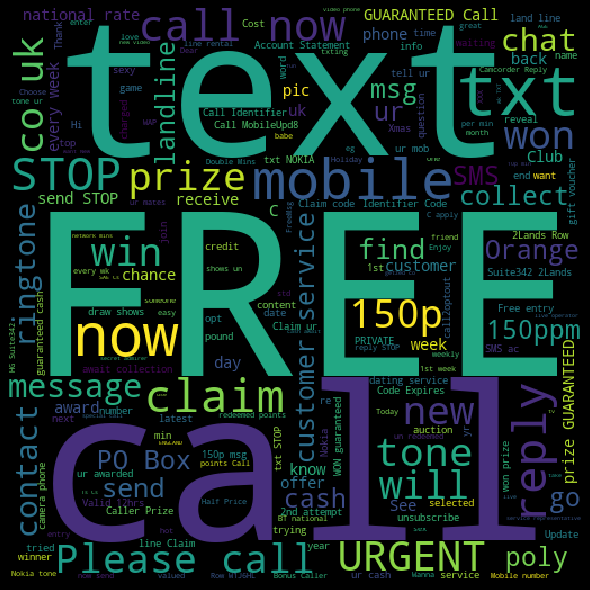

In [9]:
#wordcloud of spamwords
spam_words = ' '.join(list(mails[mails['labels'] == 'spam']['message']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

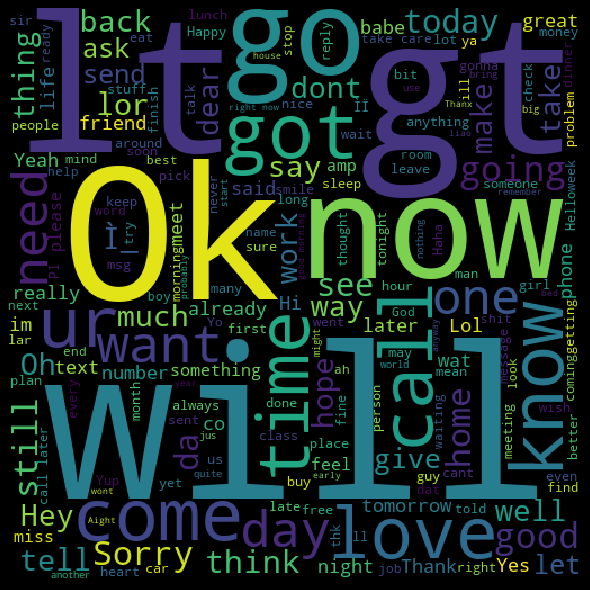

In [19]:
#wordcloud of ham words
ham_words = ' '.join(list(mails[mails['labels'] =='ham']['message']))
ham_wc = WordCloud(width = 512,height = 512).generate(ham_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [7]:
# data-cleaning
ps = PorterStemmer()
corpus = []
for i in range(0, len(mails)):
    review = re.sub('[^a-zA-Z]', ' ', mails['message'][i]) #removing numbers, punctuations and other special symbols
    review = review.lower() #converting all words in lowercase
    review = review.split() #sentence into words
    
    #converting all the words which are not in stopwords into their base root form(e.g- intelligently-> intelligent)
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    #joining the list of words
    review = ' '.join(review) 
    corpus.append(review)

In [8]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500) #taking 2500 most frequent words
X = cv.fit_transform(corpus).toarray()

In [9]:
y=pd.get_dummies(mails['labels']) #creating dummies
print(y)
#value is 1 it means it satisfy respective column type 

      ham  spam
0       1     0
1       1     0
2       0     1
3       1     0
4       1     0
...   ...   ...
5567    0     1
5568    1     0
5569    1     0
5570    1     0
5571    1     0

[5572 rows x 2 columns]


In [10]:
#we don't need both columns so using only spam ones
y=y.iloc[:,1].values
print(y)

[0 0 1 ... 0 0 0]


In [12]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0) 
#X independent ,y dependent, 80% train data,20% test data

In [13]:
# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

y_pred=spam_detect_model.predict(X_test)

In [14]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)

[[943   6]
 [  9 157]]


In [15]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.9865470852017937


In [18]:
# real-time data test
message =input("Enter the sms:")
data = [message]
vect = cv.transform(data).toarray()
res = spam_detect_model.predict(vect)
if res==1:
    print("\n\nSPAM!!!")
else:
    print("\n\nHAM☻☻")

Enter the sms:lottery lottery click to claim


SPAM!!!
